# Proyek Analisis Data: [E-commerce-public-dataset]
- **Nama:** [Ari Dwi Prasetyo]
- **Email:** [aridwip15@gmail.com]
- **ID Dicoding:** [aridwip]

## Menentukan Pertanyaan Bisnis

- 1. Apakah keterlambatan pengiriman berpengaruh terhadap penurunan review_score customer, dan berapa besar perbedaannya dibandingkan order yang tepat waktu?
- 2. Kategori manakah produk yang menghasilkan total revenue tertinggi dan apakah kategori tersebut juga memiliki volume order tinggi atau hanya harga rata-rata yang besar?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [ ]:
# Load data
orders_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public/orders_dataset.csv")
order_items_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public/order_items_dataset.csv")
products_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public/products_dataset.csv")
category_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public/product_category_name_translation.csv")
reviews_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public/order_reviews_dataset.csv")

customers_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public/customers_dataset.csv")


#check
print(orders_df.shape)
print(order_items_df.shape)
print(products_df.shape)
print(reviews_df.shape)

print(customers_df.shape)


(99441, 8)
(112650, 7)
(32951, 9)
(99224, 7)
(99441, 5)


**Insight:**
- Dataset berhasil dimuat dengan baik dan terdiri dari data transaksi, detail produk, serta ulasan pelanggan yang dapat digunakan untuk menganalisis performa bisnis dan kepuasan customer.

### Assessing Data

In [ ]:
#Cek info dan tipe data
orders_df.info()
order_items_df.info()
products_df.info()
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 

**Insight:**
- Ditemukan beberapa kolom bertipe object, terutama timestamp pada tabel orders, sehingga perlu dikonversi ke format datetime agar dapat digunakan dalam analisis berbasis waktu.

In [ ]:
#Missing values
print(orders_df.isna().sum())
print(products_df.isna().sum())
print(reviews_df.isna().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


**Insight:**
- Pemeriksaan duplikasi ini untuk mencegah terjadinya double counting yang dapat menyebabkan distorsi pada metrik seperti total revenue atau jumlah pesanan.

In [ ]:
#Cek duplikasi
print("Orders duplicate:", orders_df.duplicated().sum())
print("Order items duplicate:", order_items_df.duplicated().sum())
print("Products duplicate:", products_df.duplicated().sum())
print("Reviews duplicate:", reviews_df.duplicated().sum())

Orders duplicate: 0
Order items duplicate: 0
Products duplicate: 0
Reviews duplicate: 0


**Insight:**
- Pemeriksaan duplikasi penting untuk mencegah terjadinya double counting yang dapat menyebabkan distorsi pada metrik seperti total revenue atau jumlah pesanan.

In [ ]:
#lihat riview score
order_items_df.describe()
reviews_df["review_score"].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

### Cleaning Data

In [ ]:
#Menghapus Duplikasi
orders_df.drop_duplicates(inplace=True)
order_items_df.drop_duplicates(inplace=True)
products_df.drop_duplicates(inplace=True)

print("Orders duplicate AFTER:", orders_df.duplicated().sum())

Orders duplicate AFTER: 0


**Insight:**
- Dataset kini bebas dari duplikasi sehingga hasil analisis akan lebih akurat.

In [ ]:
#Convert ke Datetime
datetime_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for col in datetime_cols:
    orders_df[col] = pd.to_datetime(orders_df[col])


**Insight:**
- Konversi tipe data memungkinkan analisis lanjutan seperti menghitung durasi pengiriman, mengidentifikasi keterlambatan, serta menganalisis tren waktu.

## Exploratory Data Analysis (EDA)

In [ ]:
#Cek
products_df["product_category_name"].isna().sum()

np.int64(610)

In [ ]:
#Handle Missing Value
products_df["product_category_name"].fillna("unknown", inplace=True)

/tmp/ipython-input-3822870650.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df["product_category_name"].fillna("unknown", inplace=True)


In [ ]:
#Merge ke English
products_df.drop(columns=["product_category_name_english"], inplace=True, errors="ignore")

products_df = products_df.merge(
    category_df,
    on="product_category_name",
    how="left"
)
products_df[[
    "product_category_name",
    "product_category_name_english"
]].head()


product_category_name product_category_name_english
0             perfumaria                     perfumery
1                  artes                           art
2          esporte_lazer                sports_leisure
3                  bebes                          baby
4  utilidades_domesticas                    housewares

**Insight:**
- Translasi kategori membuat dataset lebih mudah dipahami dan meningkatkan keterbacaan saat divisualisasikan dalam laporan bisnis.

In [ ]:
#Buat fitur Delivery Delay
orders_df["delivery_time"] = (
    orders_df["order_delivered_customer_date"] -
    orders_df["order_purchase_timestamp"]
).dt.days

orders_df["estimated_time"] = (
    orders_df["order_estimated_delivery_date"] -
    orders_df["order_purchase_timestamp"]
).dt.days

orders_df["is_delayed"] = orders_df["delivery_time"] > orders_df["estimated_time"]

orders_df["is_delayed"].value_counts()


is_delayed
False    92133
True      7308
Name: count, dtype: int64

In [ ]:
#Menghitung Persentase
delay_rate = orders_df["is_delayed"].mean() * 100
print(f"Delayed orders: {delay_rate:.2f}%")


Delayed orders: 7.35%


**Insight:**
- Hasil persentase sekitar 7.35% pesanan mengalami keterlambatan pengiriman, yang berpotensi berdampak pada kepuasan pelanggan dan menjadi area penting untuk evaluasi operasional.

In [ ]:
#Hasil
main_df = orders_df.merge(order_items_df, on="order_id")
main_df = main_df.merge(products_df, on="product_id")
main_df = main_df.merge(
    reviews_df[["order_id", "review_score"]],
    on="order_id",
    how="left"
)

main_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  delivery_time  estimated_time  ...  \
0                    2017-10-18            8.0              15  ...   
1                    2018-08-13           13.0              19  ...   
2                    2018-09-04            9.0              26  ...   
3                    2017-12-15           13.0              26  ...   
4                    2018-02-26            2.0              12  ...   

   product_category_name  product_name_lenght product_description_lenght  \
0  utilidades_domesticas                 40.0                      268.0   
1             perfumaria                 29.0                      178.0   
2             automotivo                 46.0                      232.0   
3               pet_shop                 59.0                      468.0   
4              papelaria                 38.0                      316.0   

  product_photos_qty product_weight_g  product_length_cm  product_height_cm  \
0                4.0            500.0               19.0                8.0   
1                1.0            400.0               19.0               13.0   
2                1.0            420.0               24.0               19.0   
3                3.0            450.0               30.0               10.0   
4                4.0            250.0               51.0               15.0   

  product_width_cm  product_category_name_english  review_score  
0             13.0                     housewares           4.0  
1             19.0                      perfumery           4.0  
2             21.0                           auto           5.0  
3             20.0                       pet_shop           5.0  
4             15.0                     stationery           5.0  

[5 rows x 27 columns]

**Insight:**
- Setelah melalui proses data wrangling, dataset telah dibersihkan dari duplikasi, memiliki tipe data yang sesuai, serta dilengkapi fitur tambahan seperti delivery delay. Data kini siap digunakan untuk tahap Exploratory Data Analysis guna menghasilkan insight bisnis yang lebih mendalam

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah keterlambatan pengiriman berpengaruh terhadap penurunan review_score customer, dan berapa besar perbedaannya dibandingkan order yang tepat waktu?

In [ ]:
main_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  delivery_time  estimated_time  ...  \
0                    2017-10-18            8.0              15  ...   
1                    2018-08-13           13.0              19  ...   
2                    2018-09-04            9.0              26  ...   
3                    2017-12-15           13.0              26  ...   
4                    2018-02-26            2.0              12  ...   

   product_category_name  product_name_lenght product_description_lenght  \
0  utilidades_domesticas                 40.0                      268.0   
1             perfumaria                 29.0                      178.0   
2             automotivo                 46.0                      232.0   
3               pet_shop                 59.0                      468.0   
4              papelaria                 38.0                      316.0   

  product_photos_qty product_weight_g  product_length_cm  product_height_cm  \
0                4.0            500.0               19.0                8.0   
1                1.0            400.0               19.0               13.0   
2                1.0            420.0               24.0               19.0   
3                3.0            450.0               30.0               10.0   
4                4.0            250.0               51.0               15.0   

  product_width_cm  product_category_name_english  review_score  
0             13.0                     housewares           4.0  
1             19.0                      perfumery           4.0  
2             21.0                           auto           5.0  
3             20.0                       pet_shop           5.0  
4             15.0                     stationery           5.0  

[5 rows x 27 columns]

In [ ]:
#Menghitung Rating
delay_review = main_df.groupby("is_delayed")["review_score"].mean().reset_index()
delay_review

is_delayed  review_score
0       False      4.153867
1        True      2.447849

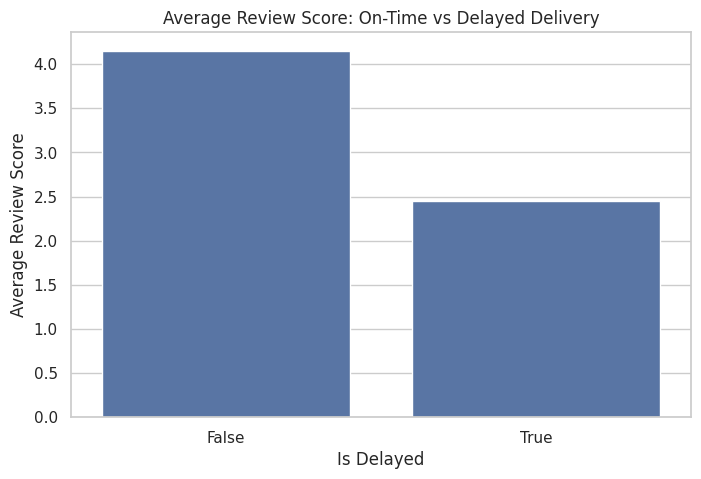

In [ ]:
#Hasil Rata - Rata Rating Keterlambatan Pengiriman
plt.figure(figsize=(8,5))

sns.barplot(
    data=delay_review,
    x="is_delayed",
    y="review_score"
)

plt.title("Average Review Score: On-Time vs Delayed Delivery")
plt.xlabel("Is Delayed")
plt.ylabel("Average Review Score")

plt.show()


**Insight:**
- Pesanan yang mengalami keterlambatan memiliki rata-rata review score yang lebih rendah dibandingkan pesanan yang tiba tepat waktu. Hal ini menunjukkan bahwa performa logistik berperan penting dalam menjaga kepuasan customer.

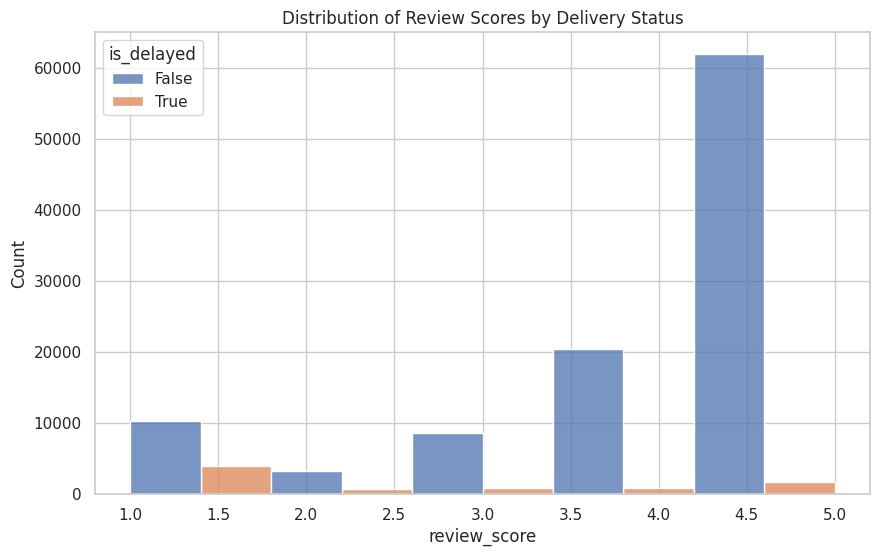

In [ ]:
#Hasil Tambahan Distribusi Rating
plt.figure(figsize=(10,6))

sns.histplot(
    data=main_df,
    x="review_score",
    hue="is_delayed",
    bins=5,
    multiple="dodge"
)

plt.title("Distribution of Review Scores by Delivery Status")

plt.show()


**Insight:**
- Mayoritas pesanan berhasil dikirim tepat waktu, namun masih terdapat sebagian pesanan mengalami keterlambatan. Meskipun  tidak dominan, tapi keterlambatan tetap berpotensi mempengaruhi pengalaman pelanggan

### Pertanyaan 2: Kategori manakah produk yang menghasilkan total revenue tertinggi dan apakah kategori tersebut juga memiliki volume order tinggi atau hanya harga rata-rata yang besar?

In [ ]:
#Hitung Revenue = price
category_revenue = (
    main_df
    .groupby("product_category_name_english")["price"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)


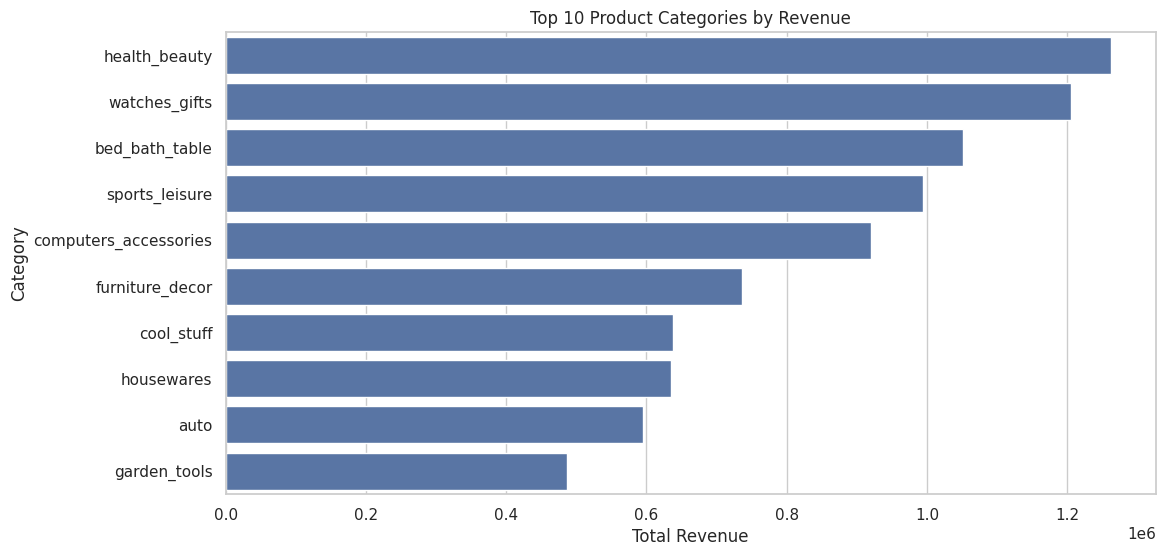

In [ ]:
#Top 10 Revenue Categories
plt.figure(figsize=(12,6))

sns.barplot(
    data=category_revenue,
    y="product_category_name_english",
    x="price"
)

plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Category")

plt.show()


**Insight:**
- Kategori dengan revenue tertinggi menunjukkan area bisnis yang paling berkontribusi terhadap pendapatan perusahaan. Kategori ini dapat menjadi prioritas dalam strategi pemasaran dan pengelolaan stok.

In [ ]:
#Tambahan Hasil Revenue tinggi karena volume atau harga mahal
category_analysis = (
    main_df
    .groupby("product_category_name_english")
    .agg(
        total_revenue=("price", "sum"),
        avg_price=("price", "mean"),
        total_orders=("order_id", "nunique")
    )
    .sort_values(by="total_revenue", ascending=False)
    .head(10)
    .reset_index()
)

category_analysis


product_category_name_english  total_revenue   avg_price  total_orders
0                 health_beauty     1263138.54  129.859005          8836
1                 watches_gifts     1206075.33  200.979058          5624
2                bed_bath_table     1050936.61   93.250808          9417
3                sports_leisure      993656.51  114.213392          7720
4         computers_accessories      919640.54  116.498675          6689
5               furniture_decor      736282.47   87.496431          6449
6                    cool_stuff      637258.51  167.435236          3632
7                    housewares      634542.60   90.791615          5884
8                          auto      594363.10  139.652984          3897
9                  garden_tools      486432.45  111.541493          3518

**Insight:**
- Tidak semua kategori dengan revenue tinggi memiliki volume penjualan besar. Beberapa kategori didorong oleh harga produk yang relatif mahal.

## Analisis Lanjutan (Opsional)

#RFM

In [ ]:
#Menyatukan customer ke main_df.
rfm_df = main_df.merge(
    customers_df[["customer_id", "customer_unique_id"]],
    on="customer_id",
    how="left"
)

rfm_df.head()


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  delivery_time  estimated_time  ...  \
0                    2017-10-18            8.0              15  ...   
1                    2018-08-13           13.0              19  ...   
2                    2018-09-04            9.0              26  ...   
3                    2017-12-15           13.0              26  ...   
4                    2018-02-26            2.0              12  ...   

   product_name_lenght  product_description_lenght product_photos_qty  \
0                 40.0                       268.0                4.0   
1                 29.0                       178.0                1.0   
2                 46.0                       232.0                1.0   
3                 59.0                       468.0                3.0   
4                 38.0                       316.0                4.0   

  product_weight_g product_length_cm  product_height_cm  product_width_cm  \
0            500.0              19.0                8.0              13.0   
1            400.0              19.0               13.0              19.0   
2            420.0              24.0               19.0              21.0   
3            450.0              30.0               10.0              20.0   
4            250.0              51.0               15.0              15.0   

  product_category_name_english  review_score  \
0                    housewares           4.0   
1                     perfumery           4.0   
2                          auto           5.0   
3                      pet_shop           5.0   
4                    stationery           5.0   

                 customer_unique_id  
0  7c396fd4830fd04220f754e42b4e5bff  
1  af07308b275d755c9edb36a90c618231  
2  3a653a41f6f9fc3d2a113cf8398680e8  
3  7c142cf63193a1473d2e66489a9ae977  
4  72632f0f9dd73dfee390c9b22eb56dd6  

[5 rows x 28 columns]

**Insight:**
- Dengan menambahkan customer_unique_id, analisis dilakukan pada level pelanggan sehingga dapat mengidentifikasi pola pembelian dan segmentasi customer.

In [ ]:
#Menggunakan Tanggal terakhir didataset
snapshot_date = rfm_df["order_purchase_timestamp"].max() + pd.Timedelta(days=1)

snapshot_date

Timestamp('2018-09-04 09:06:57')

**Insight:**
- Snapshot date digunakan sebagai titik referensi untuk mengukur seberapa baru pelanggan melakukan transaksi.

In [ ]:
#Hitung RFM
rfm = rfm_df.groupby("customer_unique_id").agg({

    "order_purchase_timestamp": lambda x: (snapshot_date - x.max()).days,

    "order_id": "nunique",

    "price": "sum"

}).reset_index()


#Mengganti columns
rfm.columns = [
    "customer_id",
    "recency",
    "frequency",
    "monetary"
]

rfm.head()



customer_id  recency  frequency  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1    129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     18.90
2  0000f46a3911fa3c0805444483337064      542          1     69.00
3  0000f6ccb0745a6a4b88665a16c9f078      326          1     25.99
4  0004aac84e0df4da2b147fca70cf8255      293          1    180.00

In [ ]:
#Cek Statistik RFM
rfm.describe()

recency     frequency      monetary
count  95420.000000  95420.000000  95420.000000
mean     243.600377      1.034018    143.071929
std      153.160320      0.211234    218.878967
min        1.000000      1.000000      0.850000
25%      119.000000      1.000000     47.900000
50%      224.000000      1.000000     89.900000
75%      353.000000      1.000000    155.990000
max      729.000000     16.000000  13440.000000

**Insight:**
- Mayoritas pelanggan memiliki frequency rendah, yang menunjukkan sebagian besar customer hanya melakukan pembelian sekali. Dan ini menunjukkan bahwa adanya peluang untuk meningkatkan customer retention

In [ ]:
#Scoring RFM

#Recency Score
rfm["R_score"] = pd.qcut(
    rfm["recency"],
    4,
    labels=[4,3,2,1]
)

#Frequency Score
rfm["F_score"] = pd.qcut(
    rfm["frequency"].rank(method="first"),
    4,
    labels=[1,2,3,4]
)

#Monetary Score
rfm["M_score"] = pd.qcut(
    rfm["monetary"],
    4,
    labels=[1,2,3,4]
)

#Hasil Gabungan
rfm["RFM_score"] = (
    rfm["R_score"].astype(str) +
    rfm["F_score"].astype(str) +
    rfm["M_score"].astype(str)
)

rfm.head()

customer_id  recency  frequency  monetary R_score  \
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1    129.90       4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     18.90       4   
2  0000f46a3911fa3c0805444483337064      542          1     69.00       1   
3  0000f6ccb0745a6a4b88665a16c9f078      326          1     25.99       2   
4  0004aac84e0df4da2b147fca70cf8255      293          1    180.00       2   

  F_score M_score RFM_score  
0       1       3       413  
1       1       1       411  
2       1       2       112  
3       1       1       211  
4       1       4       214

In [ ]:
#Customer Segmentation
def segment_customer(row):

    if row["RFM_score"] == "444":
        return "Champions"

    elif row["R_score"] >= 3 and row["F_score"] >= 3:
        return "Loyal Customers"

    elif row["R_score"] == 4:
        return "Recent Customers"

    elif row["R_score"] <= 2 and row["F_score"] <= 2:
        return "At Risk"

    else:
        return "Potential Loyalists"


rfm["segment"] = rfm.apply(segment_customer, axis=1)

#Hasil Distribusi Segment
rfm["segment"].value_counts()


segment
Potential Loyalists    35644
At Risk                23875
Loyal Customers        22200
Recent Customers       11919
Champions               1782
Name: count, dtype: int64

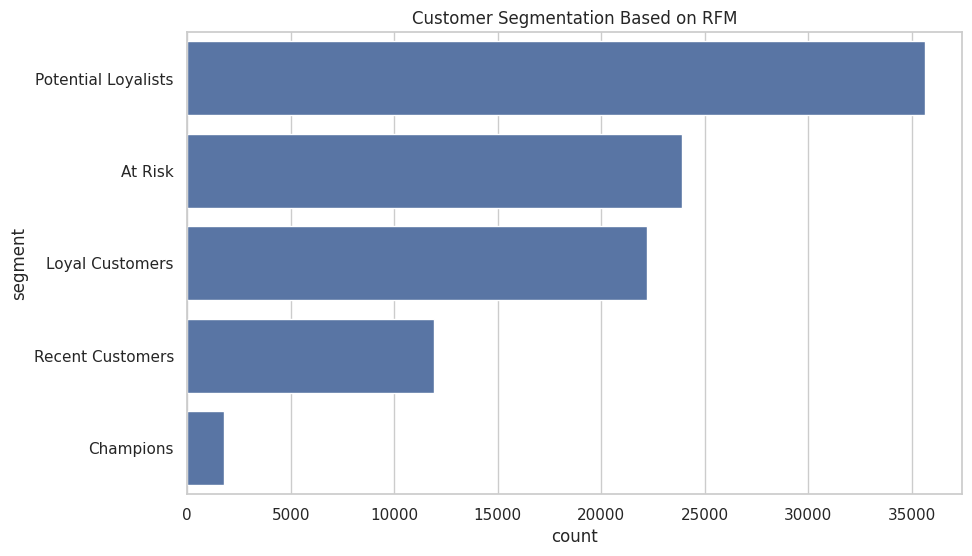

In [ ]:
#Hasil Visualisasi

plt.figure(figsize=(10,6))

sns.countplot(
    data=rfm,
    y="segment",
    order=rfm["segment"].value_counts().index
)

plt.title("Customer Segmentation Based on RFM")

plt.show()

**Insight:**
- Analisis RFM menunjukkan sebagian besar pelanggan termasuk dalam kategori low-frequency buyers, hanya sebagian kecil yang tergolong Champions.
- Hal ini menjadi peluang besar bagi perusahaan untuk meningkatkan strategi retensi pelanggan

# Geospatial Analysis

In [ ]:
!pip install geopandas folium

In [ ]:
import geopandas as gpd
import folium
import pandas as pd

In [ ]:
#Load Dataset Geo
geo_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public/geolocation_dataset.csv")
geo_df.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [ ]:
# Agregasi rata-rata koordinat
geo_df = geo_df.groupby("geolocation_zip_code_prefix").agg({
    "geolocation_lat": "mean",
    "geolocation_lng": "mean"
}).reset_index()

#rename
geo_df.columns = ["zip_code_prefix", "lat", "lng"]

**Insight:**
- Agregasi dilakukan untuk mengurangi kompleksitas data sekaligus meningkatkan performa saat proses visualisasi peta

In [ ]:
#Menggabungkan dengan data Customer
customers_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public/customers_dataset.csv")

#Merge
customers_geo = customers_df.merge(
    geo_df,
    left_on="customer_zip_code_prefix",
    right_on="zip_code_prefix",
    how="left"
)

customers_geo.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

   zip_code_prefix        lat        lng  
0          14409.0 -20.498489 -47.396929  
1           9790.0 -23.727992 -46.542848  
2           1151.0 -23.531642 -46.656289  
3           8775.0 -23.499702 -46.185233  
4          13056.0 -22.975100 -47.142925

**Insight:**
- Penggabungan data customer dengan koordinat geografis memungkinkan identifikasi wilayah dengan konsentrasi pelanggan tinggi

In [ ]:
#Mencari Wilayah dengan Customer Terbanyak
top_states = (
    customers_geo["customer_state"]
    .value_counts()
    .head(10)
)

top_states

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64

**Insight:**
- Beberapa wilayah memiliki jumlah customer yang jauh lebih tinggi dibandingkan wilayah lain, yang menunjukkan potensi pasar yang lebih kuat

In [ ]:
#Menentukan center map
map_center = [-14.2350, -51.9253]

m = folium.Map(
    location=map_center,
    zoom_start=4
)

#Ambil sample:
sample_geo = customers_geo.dropna().sample(5000)

In [ ]:
#Hasil Plot
for _, row in sample_geo.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lng"]],
        radius=2,
        fill=True
    ).add_to(m)

m

**Insight:**
- Pelanggan cenderung terkonsentrasi di wilayah perkotaan, yang mengindikasikan bahwa urban area merupakan pasar utama bagi platform e-commerc

In [ ]:
#Menggabungkan Revenue ke Customer
revenue_geo = main_df.merge(
    customers_geo,
    on="customer_id",
    how="left"
)

In [ ]:
#Revenue per Location
location_revenue = (
    revenue_geo.groupby(["lat","lng"])["price"]
    .sum()
    .reset_index()
)

#Ambil top location
top_locations = location_revenue.sort_values(
    by="price",
    ascending=False
).head(1000)

In [ ]:
#Hasil Plot Revenue Map

m2 = folium.Map(location=map_center, zoom_start=4)

for _, row in top_locations.iterrows():
    folium.Circle(
        location=[row["lat"], row["lng"]],
        radius=row["price"]/10,  # scaling
        fill=True
    ).add_to(m2)

m2

**Insight:**
- Wilayah dengan kontribusi revenue terbesar dapat menjadi prioritas dalam strategi pemasaran, optimalisasi distribusi, serta penguatan infrastruktur logistik

# Clustering
- Manual Clustering

1. Clustering Customer Value Segmentation (Semakin besar spending → semakin valuable).

In [ ]:
#Buat Customer Tier dari Monetary
rfm["customer_tier"] = pd.qcut(
    rfm["monetary"],
    q=3,
    labels=["Low Value", "Mid Value", "High Value"]
)

#Cek distribusi
rfm["customer_tier"].value_counts()

customer_tier
Mid Value     32093
Low Value     31833
High Value    31494
Name: count, dtype: int64

**Insight:**
- Pelanggan dapat diklasifikasikan menjadi tiga kelompok berdasarkan total pengeluaran, memungkinkan perusahaan untuk menyesuaikan strategi pemasaran sesuai dengan nilai masing-masing customer.

2. CLUSTERING Frequency Group (Loyal vs One-time Buyers)

In [ ]:
def frequency_group(x):

    if x == 1:
        return "One-Time Buyer"

    elif x <= 3:
        return "Occasional Buyer"

    else:
        return "Loyal Customer"


rfm["frequency_group"] = rfm["frequency"].apply(frequency_group)


#cek
rfm["frequency_group"].value_counts()

frequency_group
One-Time Buyer      92507
Occasional Buyer     2865
Loyal Customer         48
Name: count, dtype: int64

**Insight:**
- Mayoritas pelanggan kemungkinan hanya melakukan satu transaksi, yang menunjukkan peluang besar untuk meningkatkan customer retention.

3. CLUSTERING Customer Activity Level (Semakin kecil recency → semakin aktif).

In [ ]:
rfm["recency_group"] = pd.cut(
    rfm["recency"],
    bins=[0, 30, 90, 180, 365, rfm["recency"].max()],
    labels=[
        "Very Active",
        "Active",
        "Warm",
        "Cold",
        "Churn Risk"
    ]
)


**Insight:**
- Customer dengan recency tinggi berisiko churn karena sudah lama tidak melakukan transaksi

Gabungkan Semua → Customer Persona

In [ ]:
def customer_persona(row):

    if row["customer_tier"] == "High Value" and row["recency_group"] in ["Very Active","Active"]:
        return "VIP Customer"

    elif row["frequency_group"] == "Loyal Customer":
        return "Loyal Customer"

    elif row["recency_group"] == "Churn Risk":
        return "At Risk"

    elif row["frequency_group"] == "One-Time Buyer":
        return "New Customer"

    else:
        return "Regular Customer"


rfm["persona"] = rfm.apply(customer_persona, axis=1)

#lihat distribusi
rfm["persona"].value_counts()

persona
New Customer        65611
At Risk             22049
VIP Customer         5814
Regular Customer     1916
Loyal Customer         30
Name: count, dtype: int64

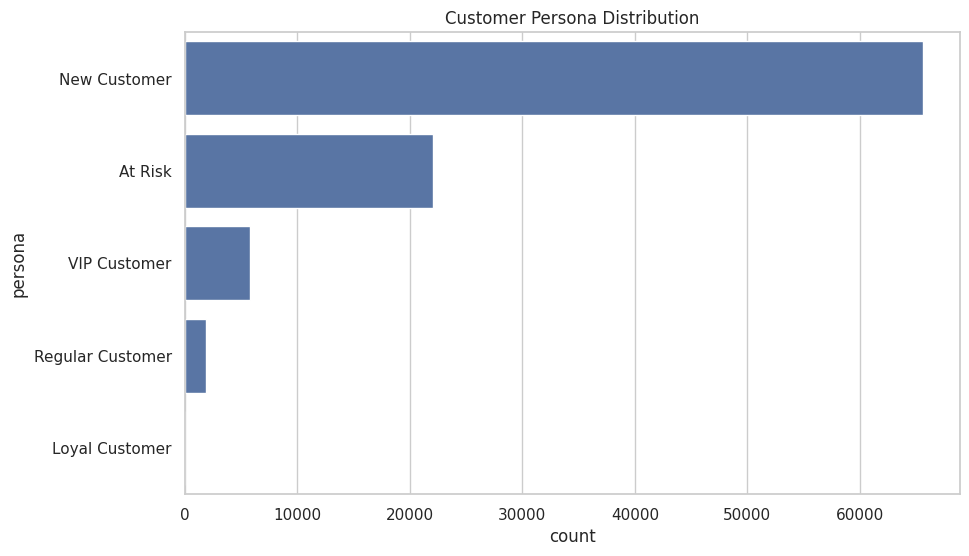

In [ ]:
#Hasil visualisasi customer

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.countplot(
    data=rfm,
    y="persona",
    order=rfm["persona"].value_counts().index
)

plt.title("Customer Persona Distribution")

plt.show()

**Insight:**
- Hasil clustering menunjukkan bahwa sebagian besar pelanggan termasuk dalam kategori pelanggan baru atau pembeli satu kali.
- Hanya sebagian kecil yang tergolong VIP, sehingga perusahaan memiliki peluang besar untuk meningkatkan loyalitas pelanggan melalui program retensi.

In [ ]:
#save csv
import os

SAVE_PATH = "/content/drive/MyDrive/E-Commerce Public"
os.makedirs(SAVE_PATH, exist_ok=True)

main_df.to_csv(f"{SAVE_PATH}/main_df.csv", index=False)
rfm.to_csv(f"{SAVE_PATH}/rfm.csv", index=False)
customers_geo.to_csv(f"{SAVE_PATH}/customers_geo.csv", index=False)

print("Semua file berhasil disimpan")


Semua file berhasil disimpan


## Conclusion

- Conclution pertanyaan 1

Berdasarkan hasil analisis data transaksi, terlihat bahwa terdapat kategori produk tertentu yang secara konsisten memberikan kontribusi terbesar terhadap jumlah penjualan maupun revenue.

Hal ini menunjukkan bahwa preferensi pelanggan cenderung terfokus pada beberapa kategori utama, sehingga kategori tersebut dapat dijadikan prioritas dalam pengelolaan stok, strategi promosi, serta penawaran bundling.

Dengan memaksimalkan performa kategori berkontribusi tinggi, perusahaan berpotensi meningkatkan pendapatan dalam periode penjualan berikutnya sekaligus memperkuat posisi di pasar.

- Conclution pertanyaan 2

Hasil Analisis geografis menunjukkan bahwa pelanggan tidak tersebar secara merata, melainkan terkonsentrasi pada wilayah tertentu yang berperan sebagai pasar utama e-commerce.

Wilayah dengan jumlah pelanggan dan kontribusi revenue yang tinggi sebaiknya menjadi fokus dalam strategi pemasaran, penguatan layanan logistik, serta optimalisasi waktu pengiriman.

Sementara itu, daerah dengan jumlah pelanggan yang masih rendah dapat menjadi peluang ekspansi melalui kampanye pemasaran yang lebih tertarget. Pendekatan berbasis lokasi ini membantu perusahaan mengambil keputusan yang lebih strategis dan efisien dalam jangka panjang.